# Assignment 1B: Basic Classification / Regression

Take the ODI dataset and load it. Alternatively, you can download a dataset of your own
choice from the web, and load that. If you opt for a downloaded dataset, write down
why that interests you, and why it is suited for classification/regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
# Initialize dataframe
df = pd.read_csv('./data/mushrooms.csv')
# Show first 5 rows
df.head()
# Class is indicative, p=poisonous and e=edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Turn labels of each attribute into unique integers
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
# Seperating attributes and label
X = df.iloc[:,1:23] 
y = df.iloc[:, 0]
X.head(), y.head()

(   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
 0          5            2          4        1     6                1   
 1          5            2          9        1     0                1   
 2          0            2          8        1     3                1   
 3          5            3          8        1     6                1   
 4          5            2          3        0     5                1   
 
    gill-spacing  gill-size  gill-color  stalk-shape  ...  \
 0             0          1           4            0  ...   
 1             0          0           4            0  ...   
 2             0          0           5            0  ...   
 3             0          1           5            0  ...   
 4             1          0           4            1  ...   
 
    stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
 0                         2                       7                       7   
 1                         2    

In [5]:
# Datasplit
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [6]:
# DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(445.32692307692304, 1019.25, 'X[8] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3363, 3136]'),
 Text(214.61538461538458, 883.35, 'X[20] <= 3.5\ngini = 0.276\nsamples = 2644\nvalue = [438, 2206]'),
 Text(85.84615384615384, 747.45, 'X[19] <= 1.5\ngini = 0.229\nsamples = 470\nvalue = [408, 62]'),
 Text(42.92307692307692, 611.55, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]'),
 Text(128.76923076923077, 611.55, 'X[7] <= 0.5\ngini = 0.093\nsamples = 429\nvalue = [408, 21]'),
 Text(85.84615384615384, 475.65, 'gini = 0.0\nsamples = 408\nvalue = [408, 0]'),
 Text(171.69230769230768, 475.65, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(343.38461538461536, 747.45, 'X[10] <= 2.0\ngini = 0.027\nsamples = 2174\nvalue = [30, 2144]'),
 Text(300.46153846153845, 611.55, 'X[12] <= 0.5\ngini = 0.009\nsamples = 2154\nvalue = [10, 2144]'),
 Text(257.53846153846155, 475.65, 'X[3] <= 0.5\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(214.61538461538458, 339.75, 'gini = 0.0\nsamples = 10\n

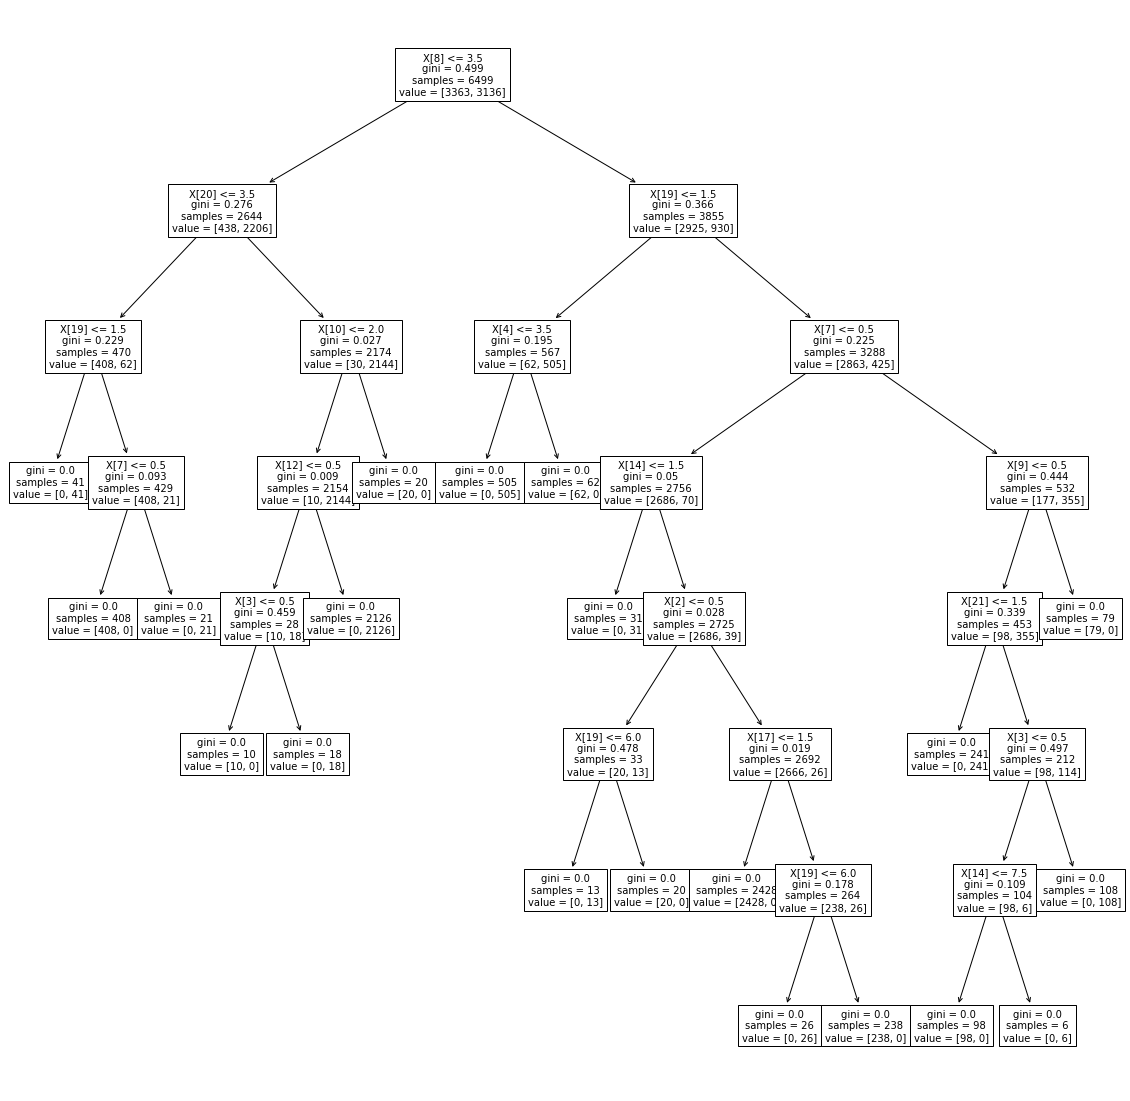

In [7]:
# Plot the tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=10)

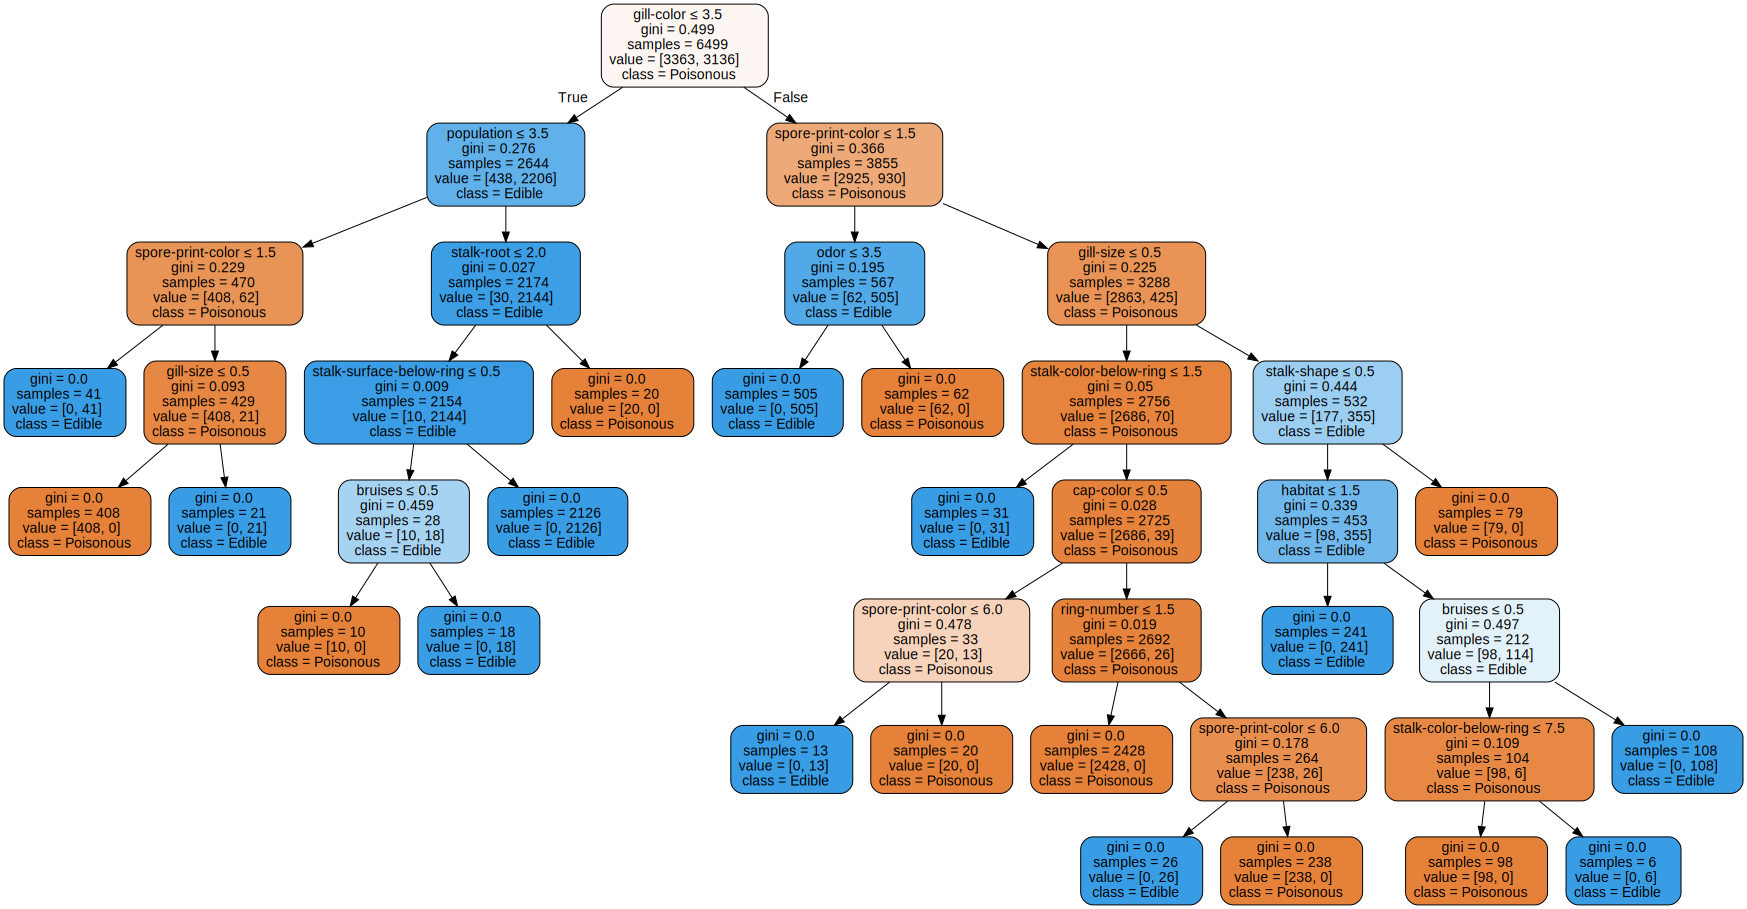

In [8]:
# Plot dot data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['Poisonous','Edible'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [9]:
# Regression with CLF, determine accuracy
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

1.0